In [14]:
# Step 1: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
import pandas as pd
from sklearn import datasets

# Load the digits dataset
digits = datasets.load_digits()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(1, digits.data.shape[1] + 1)])
df['target'] = digits.target

# Save the DataFrame to a CSV file
df.to_csv('digits_dataset.csv', index=False)

print("Digits dataset saved as 'digits_dataset.csv'")

Digits dataset saved as 'digits_dataset.csv'


In [3]:
# Step 3: Inspect the Data
print(f"Digits Dataset Features Shape: {digits.data.shape}")
print(f"Digits Dataset Target Shape: {digits.target.shape}")

Digits Dataset Features Shape: (1797, 64)
Digits Dataset Target Shape: (1797,)


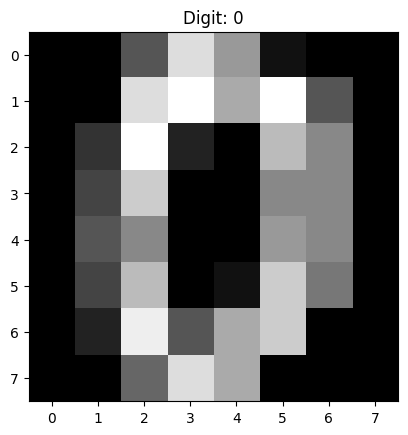

In [4]:
# Display the first image from the dataset
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Digit: {digits.target[0]}")
plt.show()

In [5]:
# Step 4: Preprocess the Data
# Flatten the images (28x28) into a vector (64 features for each image)
X = digits.data
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Step 5: Train the Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear')  # You can change the kernel ('linear', 'poly', 'rbf')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# Step 6: Make Predictions
y_pred = svm_model.predict(X_test)

In [8]:
# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%


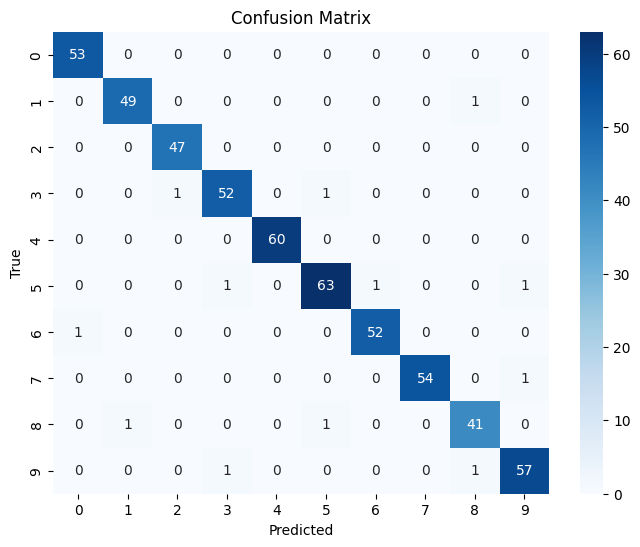

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [10]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



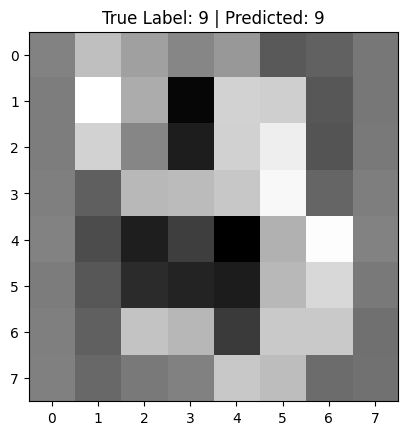

In [11]:
# Step 8: Visualize a Random Test Image and Prediction
random_idx = np.random.randint(0, len(y_test))
plt.imshow(X_test[random_idx].reshape(8, 8), cmap='gray')
plt.title(f"True Label: {y_test[random_idx]} | Predicted: {y_pred[random_idx]}")
plt.show()